In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sonar_df=pd.read_csv('/content/drive/MyDrive/mine_vs_rock.csv',header=None)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
sonar_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

In [ ]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df=sonar_df
df0 = df[df[60] == 'R']
df1 = df[df[60] == 'M']

In [ ]:
print("Number of samples in:")
print("Class label R - ", len(df0))
print("Class label M - ", len(df1))

df0 = df0.sample(len(df1), replace = True)

print('\nAfter resampling - ')
print("Number of samples in:")
print("Class label R - ", len(df0))
print("Class label M - ", len(df1))

Number of samples in:
Class label R -  97
Class label M -  111

After resampling - 
Number of samples in:
Class label R -  111
Class label M -  111


In [ ]:
df = df1.append(df0)
print('Total number of samples - ', len(df))

Total number of samples -  222


<ipython-input-37-b60b891e1062>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df0)


In [ ]:
np.shape(df)

(222, 61)

<Axes: >

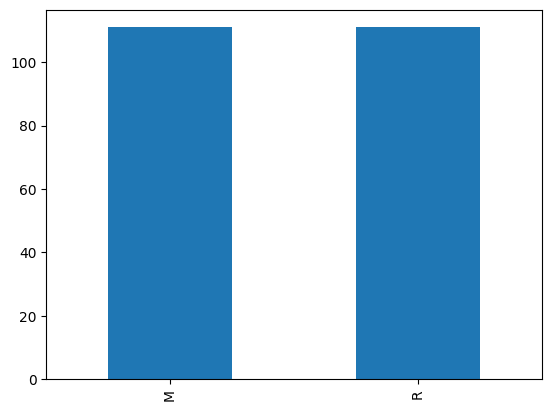

In [ ]:
df[60].value_counts().plot(kind='bar')

<ipython-input-40-171a57ce0fca>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,

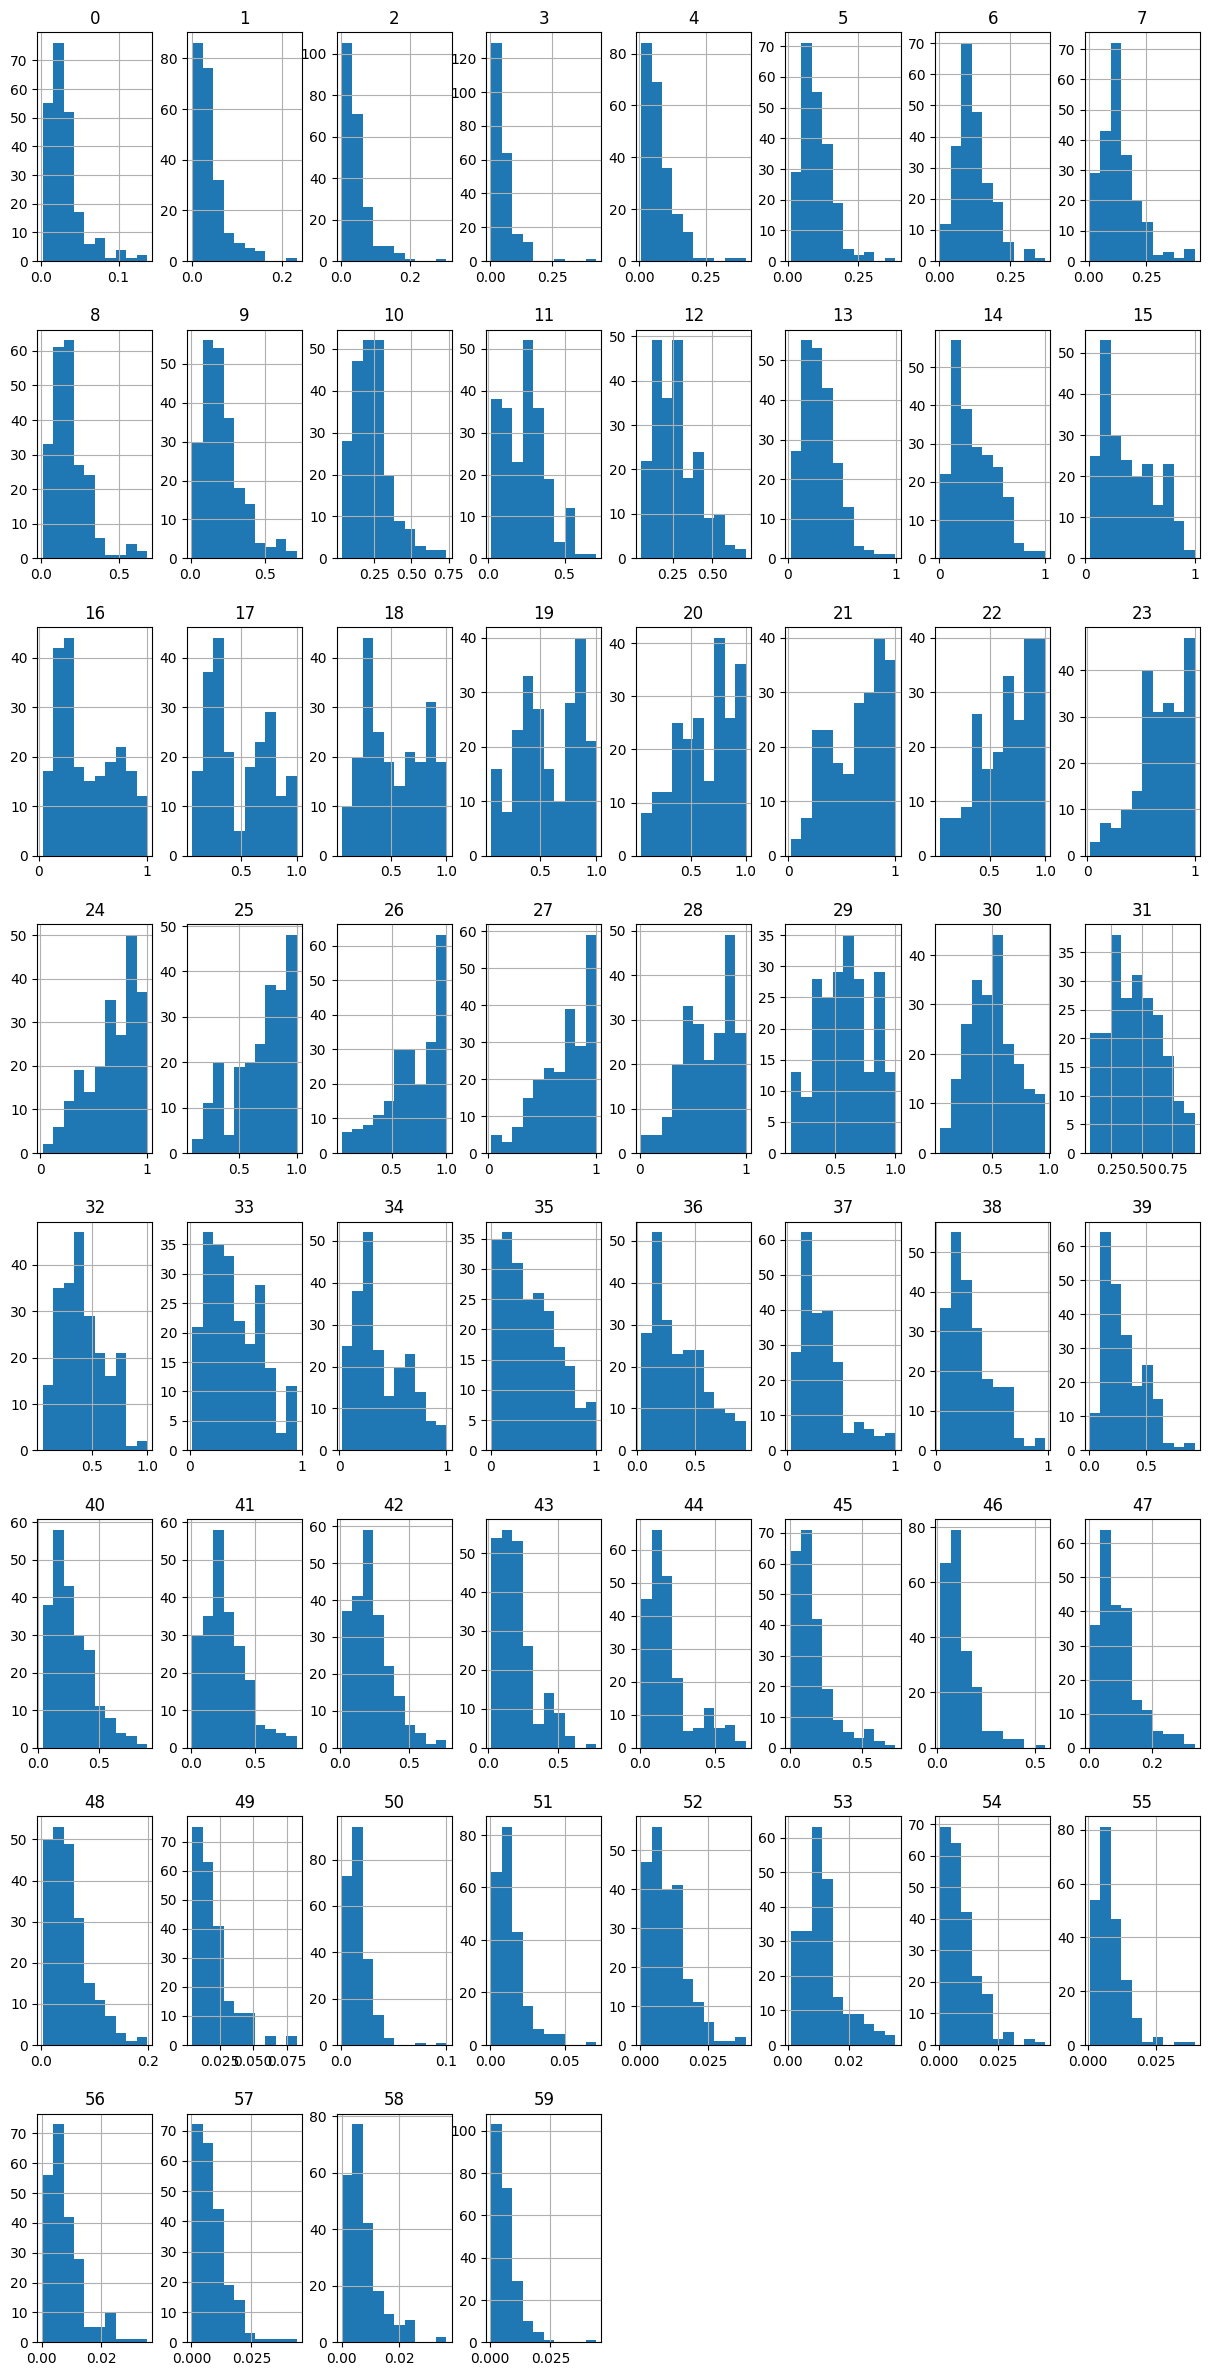

In [ ]:
fig = plt.figure(figsize = (15,30))
ax = fig.gca()
df.hist(ax = ax)

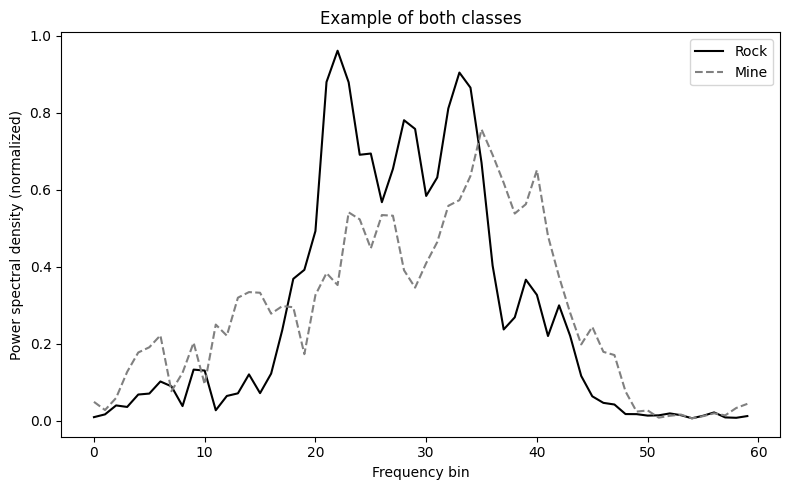

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df[df[60] == 'R'].values[0][:-1], label='Rock', color='black')
plt.plot(df[df[60] == 'M'].values[0][:-1], label='Mine', color='gray', linestyle='--')
plt.legend()
plt.title('Example of both classes')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=60,axis=1)
Y = df[60]
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
97   0.0491  0.0279  0.0592  0.1270  0.1772  0.1908  0.2217  0.0768  0.1246   
98   0.1313  0.2339  0.3059  0.4264  0.4010  0.1791  0.1853  0.0055  0.1929   
99   0.0201  0.0423  0.0554  0.0783  0.0620  0.0871  0.1201  0.2707  0.1206   
100  0.0629  0.1065  0.1526  0.1229  0.1437  0.1190  0.0884  0.0907  0.2107   
101  0.0335  0.0134  0.0696  0.1180  0.0348  0.1180  0.1948  0.1607  0.3036   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
53   0.0293  0.0378  0.0257  0.0062  0.0130  0.0612  0.0895  0.1107  0.0973   
68   0.0195  0.0142  0.0181  0.0406  0.0391  0.0249  0.0892  0.0973  0.0840   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   

         9   ...      50      51      52      53   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
test_pred = lr.predict(X_test)
lra = accuracy_score(test_pred,Y_test)
print(lra)

0.782608695652174


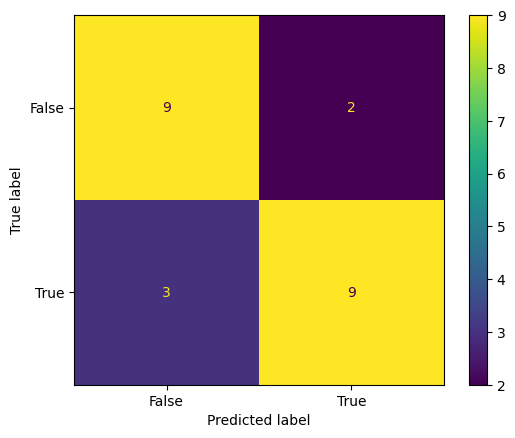

In [ ]:
cm = metrics.confusion_matrix(test_pred,Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
pd.crosstab(Y_test, test_pred, colnames=['Predicted'], margins=True)

Predicted,M,R,All
60,,,
M,9,3,12
R,2,9,11
All,11,12,23


In [ ]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.82      0.75      0.78        12

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
test_pred = knn.predict(X_test)
knna = accuracy_score(test_pred,Y_test)
print(knna)

0.9565217391304348


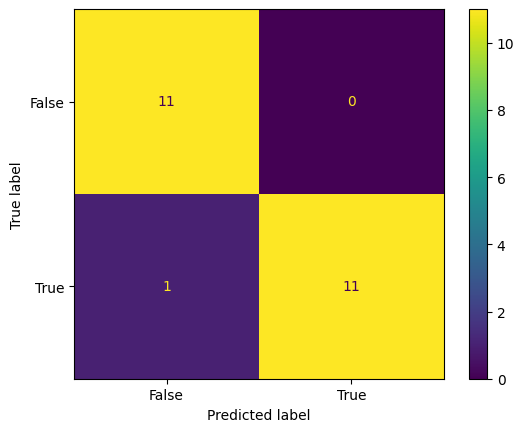

In [ ]:
cm = metrics.confusion_matrix(test_pred,Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
pd.crosstab(Y_test, test_pred, colnames=['Predicted'], margins=True)

Predicted,M,R,All
60,,,
M,11,1,12
R,0,11,11
All,11,12,23


In [ ]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

           M       0.92      1.00      0.96        11
           R       1.00      0.92      0.96        12

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
test_pred = dt.predict(X_test)
dta = accuracy_score(test_pred,Y_test)
print(dta)

0.8260869565217391


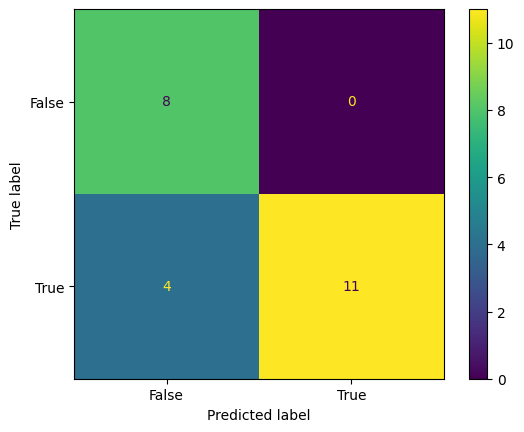

In [ ]:
cm = metrics.confusion_matrix(test_pred, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
pd.crosstab(Y_test, test_pred, colnames=['Predicted'], margins=True)

Predicted,M,R,All
60,,,
M,8,4,12
R,0,11,11
All,8,15,23


In [ ]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

           M       0.67      1.00      0.80         8
           R       1.00      0.73      0.85        15

    accuracy                           0.83        23
   macro avg       0.83      0.87      0.82        23
weighted avg       0.88      0.83      0.83        23



In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train,Y_train)

SVC()

In [ ]:
test_pred = svm.predict(X_test)
svma = accuracy_score(test_pred,Y_test)
print(svma)

0.8695652173913043


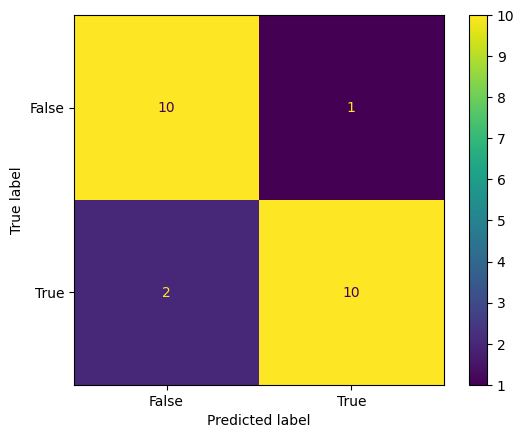

In [ ]:
cm = metrics.confusion_matrix(test_pred, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

           M       0.83      0.91      0.87        11
           R       0.91      0.83      0.87        12

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



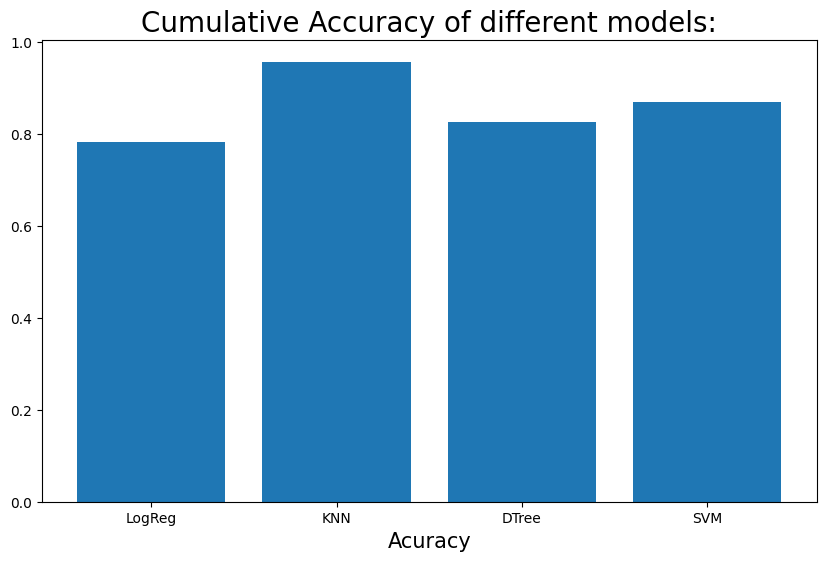

In [ ]:
plt.figure(figsize= (10,6))
acc = [lra,knna,dta,svma]
name = ['LogReg','KNN','DTree','SVM']
plt.title('Cumulative Accuracy of different models:', fontsize = 20)
plt.xlabel('Acuracy', fontsize = 15)
plt.bar(name,acc)
plt.show()

In [ ]:
input_data = (0.0201,0.0376,0.0438,0.0207,0.0954,0.0906,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input_data_np_array = np.asarray(input_data)
reshaped_input = input_data_np_array.reshape(1,-1)
prediction = knn.predict(reshaped_input)

if prediction[0] == 'R':
  print('The object is a Rock')
else:
  print('The object is a Mine')


The object is a Mine
